# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity

# Loading Data

In [4]:
df = pd.read_csv('/kaggle/input/movies/movies.csv')

df.head(5)

,id,title,genres,overview,rating,spoken_languages,cast,crew,vote_average,vote_count,popularity,budget,keywords,production_companies,revenue,runtime
0,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",3.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0
1,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",4.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0
2,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",5.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0
3,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",2.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0
4,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",3.5,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0


In [5]:
df.shape

(28610, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28610 entries, 0 to 28609
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    28610 non-null  int64  
 1   title                 28610 non-null  object 
 2   genres                28562 non-null  object 
 3   overview              28610 non-null  object 
 4   rating                28610 non-null  float64
 5   spoken_languages      28408 non-null  object 
 6   cast                  28477 non-null  object 
 7   crew                  28584 non-null  object 
 8   vote_average          28610 non-null  float64
 9   vote_count            28610 non-null  float64
 10  popularity            28610 non-null  float64
 11  budget                28610 non-null  int64  
 12  keywords              27442 non-null  object 
 13  production_companies  27547 non-null  object 
 14  revenue               28610 non-null  float64
 15  runtime            

In [7]:
df.isnull().sum()

id                         0
title                      0
genres                    48
overview                   0
rating                     0
spoken_languages         202
cast                     133
crew                      26
vote_average               0
vote_count                 0
popularity                 0
budget                     0
keywords                1168
production_companies    1063
revenue                    0
runtime                    0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26612 entries, 0 to 28609
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    26612 non-null  int64  
 1   title                 26612 non-null  object 
 2   genres                26612 non-null  object 
 3   overview              26612 non-null  object 
 4   rating                26612 non-null  float64
 5   spoken_languages      26612 non-null  object 
 6   cast                  26612 non-null  object 
 7   crew                  26612 non-null  object 
 8   vote_average          26612 non-null  float64
 9   vote_count            26612 non-null  float64
 10  popularity            26612 non-null  float64
 11  budget                26612 non-null  int64  
 12  keywords              26612 non-null  object 
 13  production_companies  26612 non-null  object 
 14  revenue               26612 non-null  float64
 15  runtime            

# Popularity based Recommendation System using Weighted Rating
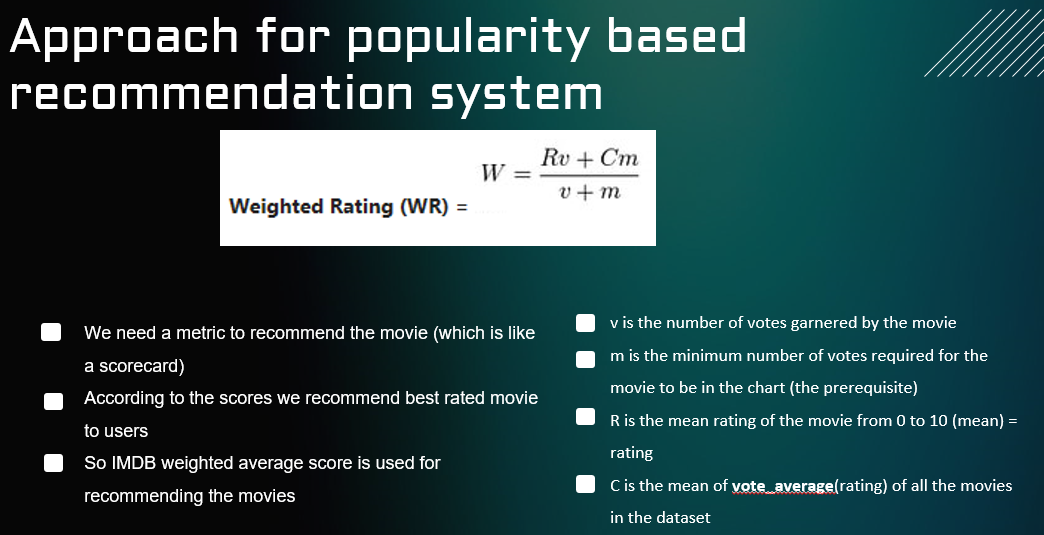

In [10]:
#Calculate the number of votes garnered by the 80th percentile movie
m = df['vote_count'].quantile(0.80)
m

1193.0

In [11]:
# Calculate C
C = df['vote_average'].mean()
C

6.562952803246656

In [12]:
df = df[df['vote_count'] >= m] # as m is minimum number of votes required for the movie to be in the chart

df.head(5)

,id,title,genres,overview,rating,spoken_languages,cast,crew,vote_average,vote_count,popularity,budget,keywords,production_companies,revenue,runtime
0,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",3.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0
1,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",4.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0
2,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",5.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0
3,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",2.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0
4,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",3.5,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0


## Function for the formula
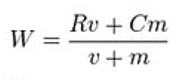

In [13]:
def weighted_rating(x,m=m,C=C):
    v = x['vote_count']
    R = x['vote_average']
    return ((v/v+m)*R) + ((m/v+m)*C)

## weighted rating (score) which is used for recommending movies

In [15]:
df['score'] = df.apply(weighted_rating,axis=1)

In [16]:
df.drop(labels=['rating'],axis=1,inplace=True)

In [17]:
df.head(5)

,id,title,genres,overview,spoken_languages,cast,crew,vote_average,vote_count,popularity,budget,keywords,production_companies,revenue,runtime,score
0,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0,17024.848604
1,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0,17024.848604
2,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0,17024.848604
3,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0,17024.848604
4,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0,17024.848604


In [18]:
df.duplicated().sum()

4465

In [19]:
new_df = df.drop_duplicates()
new_df = new_df.sort_values('score', ascending=False)

new_df[["title", "vote_count", "vote_average", "score",'popularity']].head(10) #dropping unnecessary columns

,title,vote_count,vote_average,score,popularity
3323,The Godfather,6024.0,8.5,17979.902429,41.109264
1439,The Shawshank Redemption,8358.0,8.5,17979.539474,51.645403
4700,Psycho,2405.0,8.3,17743.058246,36.826309
4523,One Flew Over the Cuckoo's Nest,3001.0,8.3,17742.411692,35.529554
4718,The Godfather: Part II,3418.0,8.3,17742.093391,36.629307
8655,Life Is Beautiful,3643.0,8.3,17741.951913,39.394970
17139,Spirited Away,3968.0,8.3,17741.775880,41.048867
27805,Whiplash,4376.0,8.3,17741.591909,64.299990
2352,Schindler's List,4436.0,8.3,17741.567708,41.725123
1350,Pulp Fiction,8670.0,8.3,17740.705763,140.950236


# Exploratory Data Analysis

## Univariate Analysis

Text(0, 0.5, 'Movie Title')

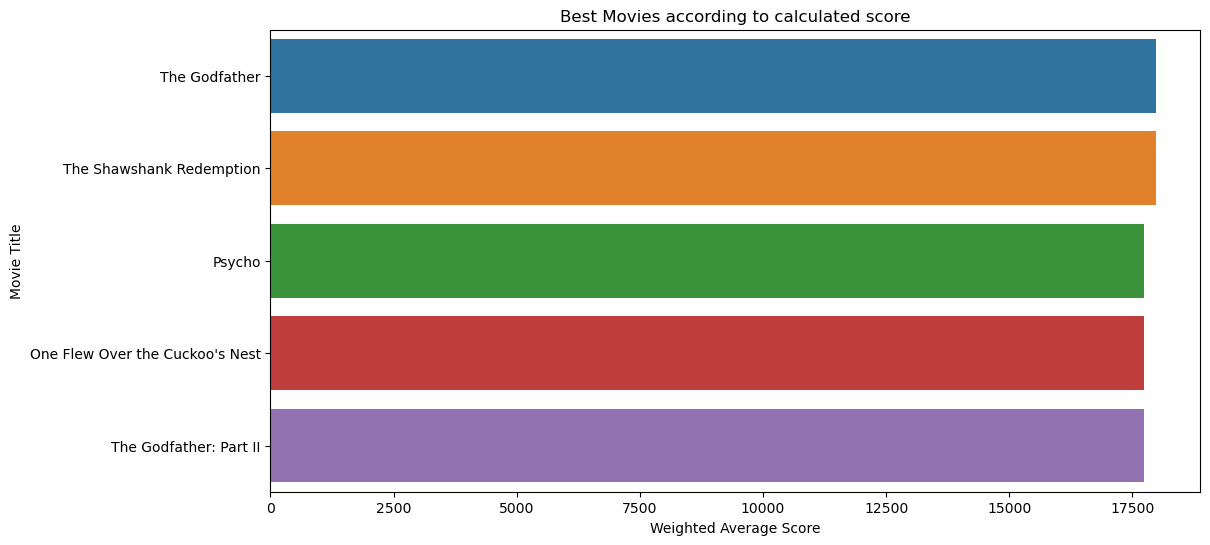

In [29]:
weight_average = new_df.sort_values('score',ascending=False)

plt.figure(figsize=(12,6))

axis1=sns.barplot(x=weight_average['score'].head(5), y=weight_average['title'].head(5), data=weight_average)

plt.title('Best Movies according to calculated score')
plt.xlabel('Weighted Average Score')
plt.ylabel('Movie Title')

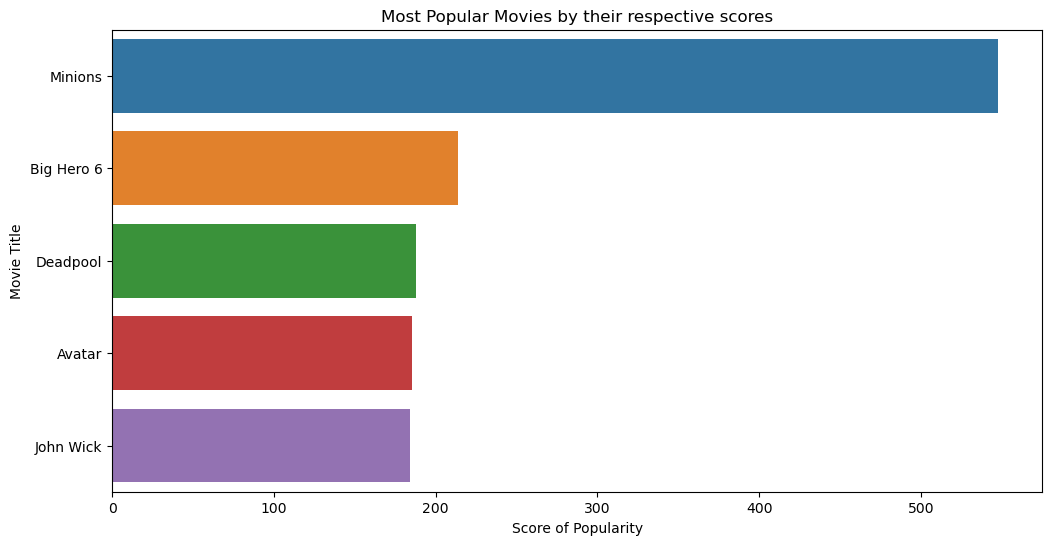

In [31]:
popularity = new_df.sort_values('popularity',ascending=False)

plt.figure(figsize=(12,6))

ax = sns.barplot(x=popularity['popularity'].head(5), y=popularity['title'].head(5), data=popularity)

plt.title('Most Popular Movies by their respective scores')
plt.xlabel('Score of Popularity')
plt.ylabel('Movie Title')

plt.show()

<Axes: ylabel='Frequency'>

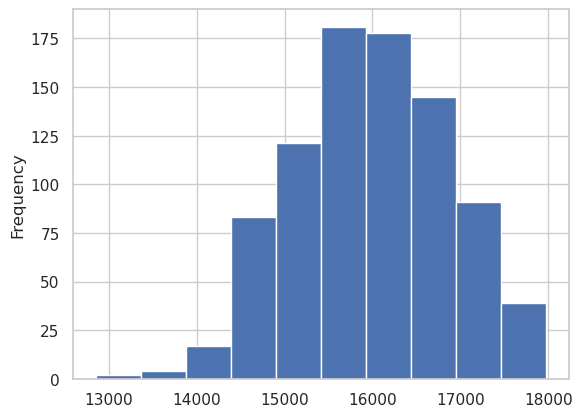

In [37]:
weight_average['score'].plot(kind='hist')

<Axes: ylabel='Density'>

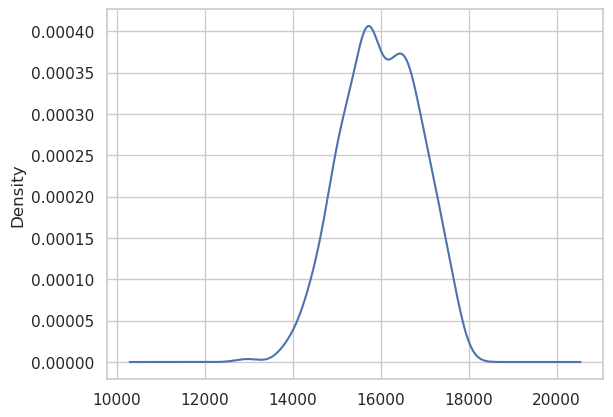

In [38]:
weight_average['score'].plot(kind='kde')

## Bivariate Analysis

<Axes: xlabel='score', ylabel='budget'>

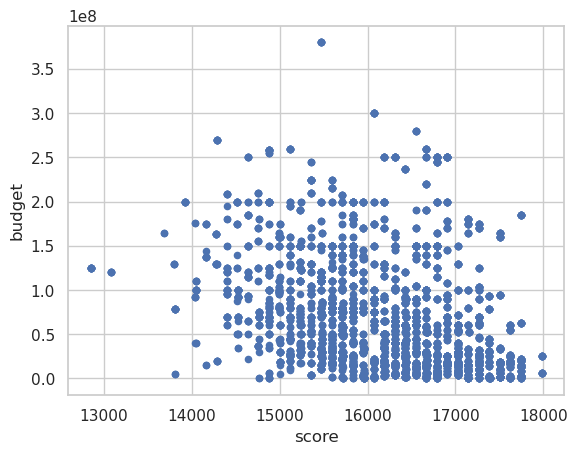

In [39]:
df.plot(kind='scatter',x='score',y='budget')

### It looks like we dont have a strong relationship between score and budget

<Axes: xlabel='score', ylabel='revenue'>

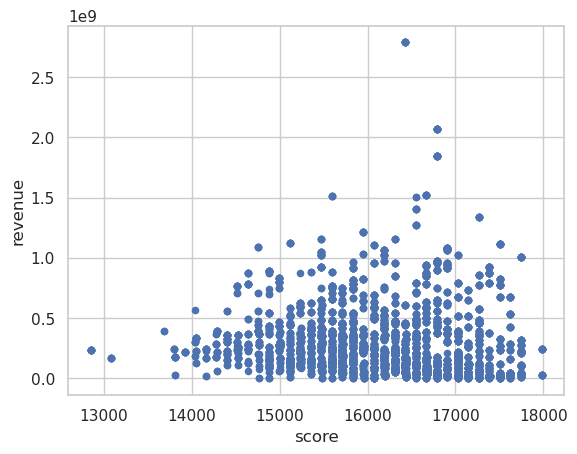

In [40]:
df.plot(kind='scatter',x='score',y='revenue')

### It looks like we dont have a strong relationship between score and revenue

<Axes: xlabel='score', ylabel='runtime'>

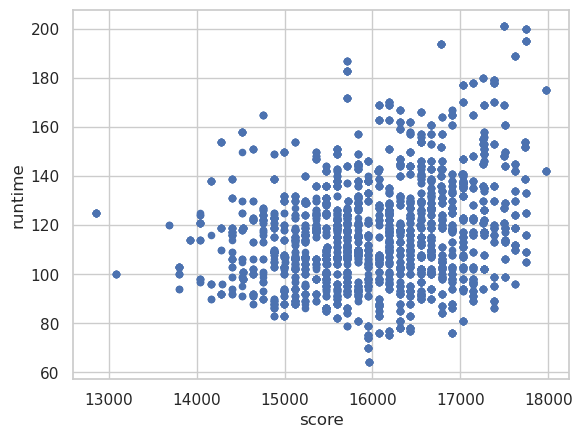

In [41]:
df.plot(kind='scatter',x='score',y='runtime')

### It looks like we dont have a strong relationship between score and runtime

<Axes: xlabel='score', ylabel='vote_average'>

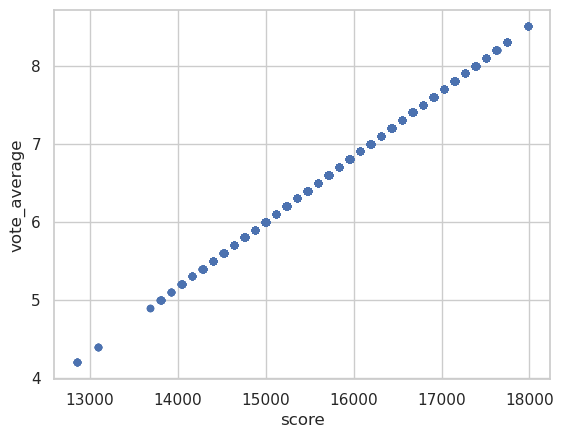

In [42]:
df.plot(kind='scatter',x='score',y='vote_average')

### It looks like we have a strong relationship between score and vote_average

<Axes: xlabel='score', ylabel='vote_count'>

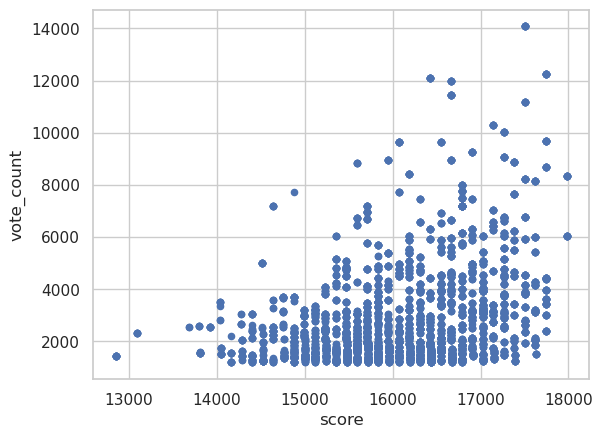

In [43]:
df.plot(kind='scatter',x='score',y='vote_count')

### It looks like we dont have a strong relationship between score and vote_count

<Axes: xlabel='score', ylabel='popularity'>

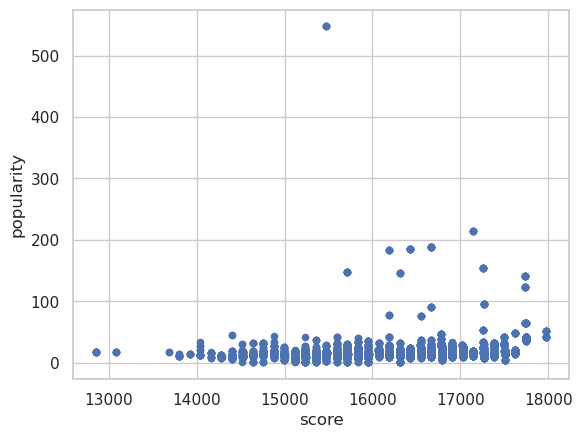

In [44]:
df.plot(kind='scatter',x='score',y='popularity')

### It looks like we have a strong relationship between score and popularity
### Hence we didnt include revenue, runtime as features in new_df as they dont help much in recommending a movie

# Serialization and Deserialization 

In [23]:
from pickle import dump
from pickle import load

In [24]:
dump(weight_average,open('movies_popularity.pkl','wb'))

dump(popularity,open('weight_average.pkl','wb'))

In [25]:
popularity = load(open('movies_popularity.pkl', 'rb'))
weighted_score = load(open('weight_average.pkl', 'rb'))

In [26]:
popularity.head(5)

,id,title,genres,overview,spoken_languages,cast,crew,vote_average,vote_count,popularity,budget,keywords,production_companies,revenue,runtime,score
3323,238,The Godfather,Drama Crime,"Spanning the years 1945 to 1955, a chronicle o...",English Italiano Latin,MarlonBrando AlPacino JamesCaan,FrancisFordCoppola,8.5,6024.0,41.109264,6000000,italy loveatfirstsight lossoffather patriarch ...,Paramount Pictures Alfran Productions,245066411.0,175.0,17979.902429
1439,278,The Shawshank Redemption,Drama Crime,Framed in the 1940s for the double murder of h...,English,TimRobbins MorganFreeman BobGunton,FrankDarabont,8.5,8358.0,51.645403,25000000,prison corruption policebrutality prisoncell d...,Castle Rock Entertainment Warner Bros.,28341469.0,142.0,17979.539474
4700,539,Psycho,Drama Horror Thriller,When larcenous real estate clerk Marion Crane ...,English,AnthonyPerkins VeraMiles JohnGavin,AlfredHitchcock,8.3,2405.0,36.826309,806948,hotel clerk arizona shower rain motel money se...,Paramount Pictures Universal Pictures Shamley ...,32000000.0,109.0,17743.058246
4523,510,One Flew Over the Cuckoo's Nest,Drama,While serving time for insanity at a state men...,English,JackNicholson LouiseFletcher DannyDeVito,MilošForman,8.3,3001.0,35.529554,3000000,individual rebel self-destruction wheelchair l...,United Artists Fantasy Films Warner Bros.,108981275.0,133.0,17742.411692
4718,240,The Godfather: Part II,Drama Crime,In the continuing saga of the Corleone crime f...,English Italiano Latin Español,AlPacino RobertDuvall DianeKeaton,FrancisFordCoppola,8.3,3418.0,36.629307,13000000,italo-american cuba vororte melancholy praise ...,Paramount Pictures The Coppola Company,47542841.0,200.0,17742.093391


In [27]:
weighted_score.head(5)

,id,title,genres,overview,spoken_languages,cast,crew,vote_average,vote_count,popularity,budget,keywords,production_companies,revenue,runtime,score
28352,211672,Minions,Family Animation Adventure Comedy,"Minions Stuart, Kevin and Bob are recruited by...",English,SandraBullock JonHamm MichaelKeaton,KyleBalda,6.4,4729.0,547.488298,74000000,assistant aftercreditsstinger duringcreditssti...,Universal Pictures Illumination Entertainment,1.156731e+09,91.0,15472.858351
27959,177572,Big Hero 6,Adventure Family Animation Action Comedy,The special bond that develops between plus-si...,English,ScottAdsit RyanPotter DanielHenney,ChrisWilliams,7.8,6289.0,213.849907,165000000,brotherbrotherrelationship hero talent revenge...,Walt Disney Pictures Walt Disney Animation Stu...,6.521054e+08,102.0,17144.047662
28144,293660,Deadpool,Action Adventure Comedy,Deadpool tells the origin story of former Spec...,English,RyanReynolds MorenaBaccarin EdSkrein,TimMiller,7.4,11444.0,187.860492,58000000,antihero mercenary marvelcomic superhero based...,Twentieth Century Fox Film Corporation Marvel ...,7.831130e+08,108.0,16665.886861
25172,19995,Avatar,Action Adventure Fantasy ScienceFiction,"In the 22nd century, a paraplegic Marine is di...",English Español,SamWorthington ZoeSaldana SigourneyWeaver,JamesCameron,7.2,12114.0,185.070892,237000000,cultureclash future spacewar spacecolony socie...,Ingenious Film Partners Twentieth Century Fox ...,2.787965e+09,162.0,16427.049021
27933,245891,John Wick,Action Thriller,Ex-lunatic John Wick comes off his meds to tra...,Magyar English Pусский,KeanuReeves MichaelNyqvist AlfieAllen,ChadStahelski,7.0,5499.0,183.870374,20000000,hitman russianmafia revenge murder gangster do...,Summit Entertainment Warner Bros. 87Eleven Def...,8.876166e+07,101.0,16189.026517
